# 1.0 Defining the Question

> ## Specifying the Data Analytic Question

> ## Defining the Metric for success

> ## Understanding the Context

> ## Recording the Experimental Design

> ## Data Relevance

# 2.0 Importing libraries

In [ ]:
# Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, t, norm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3.0 Loading the data

In [ ]:
# Reading the dataset into our environment
data = pd.read_csv("/content/sales_data.csv", encoding= 'latin1')

# 4.0 Previewing the dataset

In [ ]:
# Checking the number of records 
data.shape

(2823, 25)

In [ ]:
# Previewing the first five records
data.head(5)

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small
1        10121               34  ...              Paul     Small
2        10134               41  ...            Daniel    Medium
3        10145               45  ...             Julie    Medium
4        10159               49  ...             Julie    Medium

[5 rows x 25 columns]

In [ ]:
# Previewing the last five records
data.tail(5)

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
2818        10350               20  ...             Diego     Small
2819        10373               29  ...            Pirkko    Medium
2820        10386               43  ...             Diego    Medium
2821        10397               34  ...           Annette     Small
2822        10414               47  ...              Juri    Medium

[5 rows x 25 columns]

In [ ]:
# Checking the datatypes for each column
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
#Checking the info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# 5.0 Data preparation


## Validity

In [ ]:
#Dropping the columns we will not use in our analysis 

data.drop(['ORDERNUMBER','ORDERLINENUMBER','PHONE','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY'], axis=1, inplace=True)

#Confirming if the columns have been dropped
data.head(0)

Empty DataFrame
Columns: [QUANTITYORDERED, PRICEEACH, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, ADDRESSLINE1, CITY, COUNTRY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

## Accuracy

In [ ]:
# We can describe the data using the describe function to check on our descriptive statistics
data.describe()

QUANTITYORDERED    PRICEEACH  ...     YEAR_ID         MSRP
count      2823.000000  2823.000000  ...  2823.00000  2823.000000
mean         35.092809    83.658544  ...  2003.81509   100.715551
std           9.741443    20.174277  ...     0.69967    40.187912
min           6.000000    26.880000  ...  2003.00000    33.000000
25%          27.000000    68.860000  ...  2003.00000    68.000000
50%          35.000000    95.700000  ...  2004.00000    99.000000
75%          43.000000   100.000000  ...  2004.00000   124.000000
max          97.000000   100.000000  ...  2005.00000   214.000000

[8 rows x 7 columns]

In [ ]:
# Using the mean formula, confirm if the data is accurate
# by calculating the average of the sales and compare with the one shown above
mean = data['SALES'].mean()
print("The average sales in our data is: ", mean)

# The data indeed is accurate

The average sales in our data is:  3553.88907190932


## Completeness

In [ ]:
# Checking for null values
data.isnull().sum()

QUANTITYORDERED     0
PRICEEACH           0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

## Consistency

In [ ]:
# Checking if our dataset contains any duplicate values
data.duplicated().values.any()

False

## Uniformity

In [ ]:
# Changing the columns to lower case
data.columns = data.columns.str.lower()
data.head(0)

Empty DataFrame
Columns: [quantityordered, priceeach, sales, orderdate, status, qtr_id, month_id, year_id, productline, msrp, productcode, customername, addressline1, city, country, contactlastname, contactfirstname, dealsize]
Index: []

In [ ]:
# Renaming the columns
data= data.rename(columns={'quantityordered':'quantity_ordered','contactfirstname':'contact_first_name','priceeach':'price','orderdate':'order_date','productline':'product','productcode':'product_code','customername':'customer_name','addressline1':'address_line1','contactlastname':'contact_last_name','contactfirstname':'contact_first_name','dealsize':'deal_size', 'year_id':'year','month_id':'month','qtr_id':'annual_qtr'})
data.head(0)

Empty DataFrame
Columns: [quantity_ordered, price, sales, order_date, status, annual_qtr, month, year, product, msrp, product_code, customer_name, address_line1, city, country, contact_last_name, contact_first_name, deal_size]
Index: []

In [ ]:
#Combining the first and the last contact names
data['contact_name']=data['contact_first_name'] + data['contact_last_name']

#Dropping the first and last customer name columns
data.drop(['contact_first_name','contact_last_name'],axis=1,inplace=True)
data.head(0)

Empty DataFrame
Columns: [quantity_ordered, price, sales, order_date, status, annual_qtr, month, year, product, msrp, product_code, customer_name, address_line1, city, country, deal_size, contact_name]
Index: []

## Checking for Outliers

In [ ]:
# Using the IQR formula
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

address_line1        0
annual_qtr           0
city                 0
contact_name         0
country              0
customer_name        0
deal_size            0
month                0
msrp                28
order_date           0
price                0
product              0
product_code         0
quantity_ordered     8
sales               81
status               0
year                 0
dtype: int64

<Figure size 648x360 with 0 Axes>

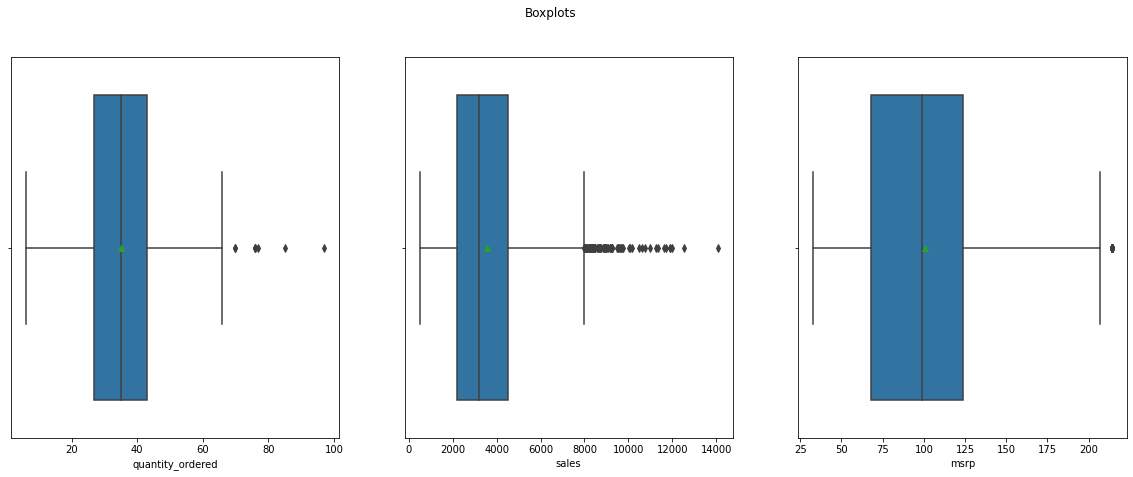

In [ ]:
# Visualizing the data outliers using boxplots
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2,ax3) =plt.subplots(1,3, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(data=data,x=data['quantity_ordered'],ax=ax1,showmeans=True)
sns.boxplot(data=data,x=data['sales'],ax=ax2,showmeans=True)
sns.boxplot(data=data,x=data['msrp'],ax=ax3,showmeans=True)


**We decided not to drop the Sales outliers because they were an actual representation of the number of sales made by the company at that specific time. The same logic was applied to the 'Quantity Ordered' and 'MSRP' columns since removing them would distort our data and make it inconsistent and inaccurate.**

## Exporting the data into a new file

In [ ]:
# Exporting the cleaned dataset into a new file for further data visualization using Tableau
data.to_csv("export_sales_data.csv")

# 6.0 Exploratory Data Analysis

## 6.1 Univariate Analysis

### 6.1.1 Categorical Variables

> #### a) Frequency tables

In [ ]:
data['status'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: status, dtype: int64

In [ ]:
data['product'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: product, dtype: int64

In [ ]:
data['customer_name'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: customer_name, Length: 92, dtype: int64

In [ ]:
data['address_line1'].value_counts()

C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: address_line1, Length: 92, dtype: int64

In [ ]:
data['country'].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: country, dtype: int64

In [ ]:
data['city'].value_counts()

Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich             14
Burbank            13
Charleroi           8
Name: city, Length: 73, dtype: int64

In [ ]:
data['deal_size'].value_counts()

Medium    1384
Small     1282
Large      157
Name: deal_size, dtype: int64

In [ ]:
data.head(0)

Empty DataFrame
Columns: [quantity_ordered, price, sales, order_date, status, annual_qtr, month, year, product, msrp, product_code, customer_name, address_line1, city, country, deal_size, contact_name]
Index: []

> #### b) Bar charts

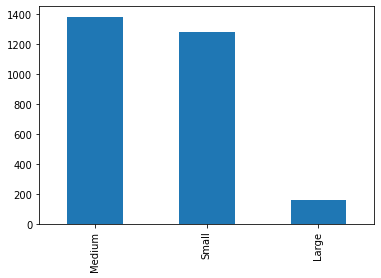

<Figure size 1008x648 with 0 Axes>

In [ ]:
# Bar chart for the deal size
data['deal_size'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

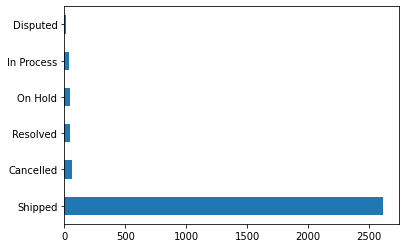

<Figure size 1008x648 with 0 Axes>

In [ ]:
# Bar chart for the status
data['status'].value_counts().plot(kind='barh')
fig=plt.figure(figsize=(14,9))
plt.show()

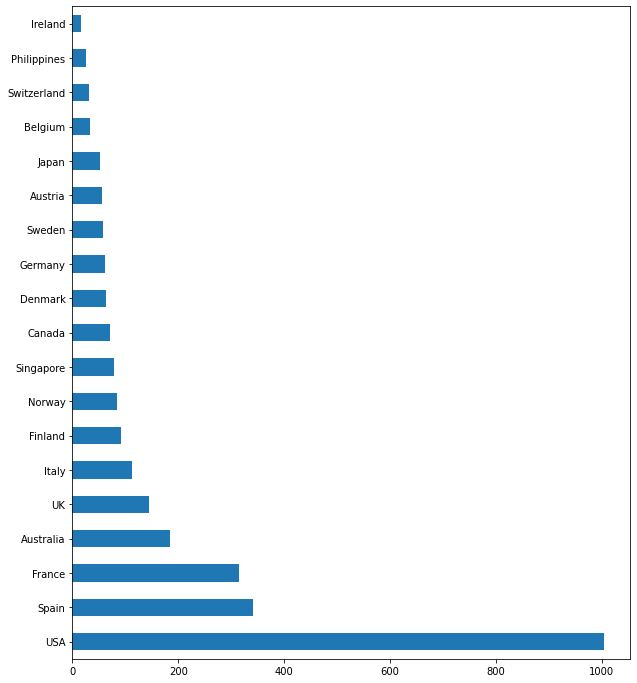

In [ ]:
# Horizontal bar chart of the countries
data['country'].value_counts().plot(kind='barh', figsize=(10,12))
#fig=plt.figure(figsize=(100,15))
plt.show()

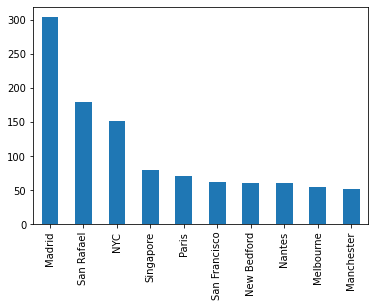

In [ ]:
# Bar chart for the top 10 cities
x = data['city'].value_counts().nlargest(10)
x.plot(kind='bar')
plt.show()

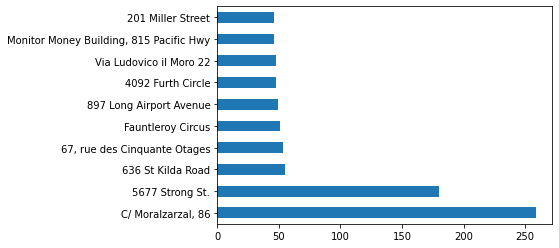

In [ ]:
# Horizontal Bar chart for the address lines
y = data['address_line1'].value_counts().nlargest(10)
y.plot(kind='barh')
plt.show()

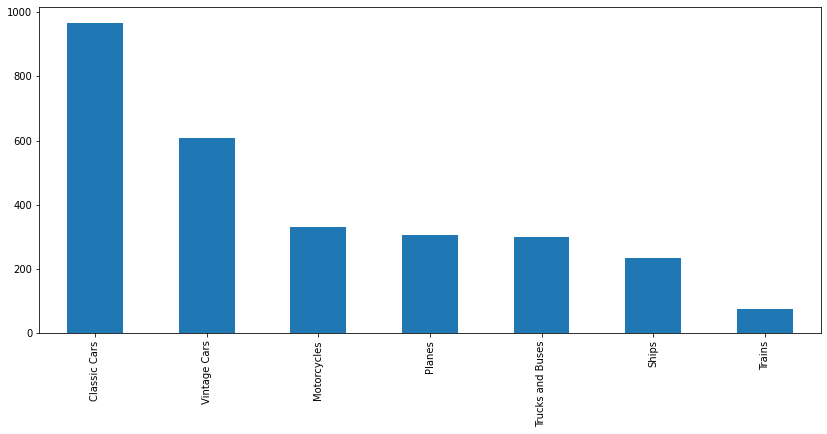

In [ ]:
# Bar chart for the products
data['product'].value_counts().plot(kind = 'bar', figsize = (14,6))
plt.show()

> #### c) Pie charts

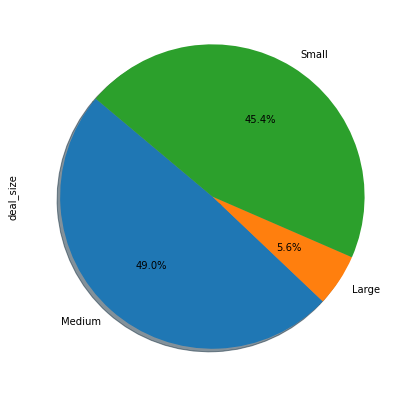

In [ ]:
# Pie chart for the deal size
data['deal_size'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.show()

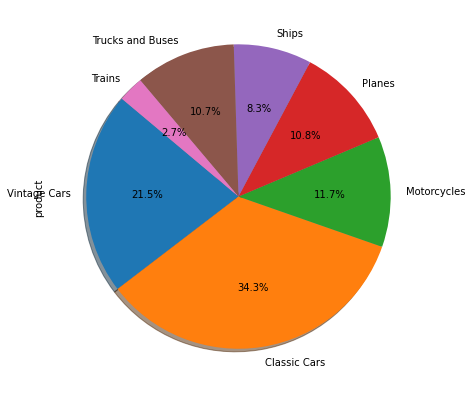

In [ ]:
# Pie chart for the product lines
data['product'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.show()

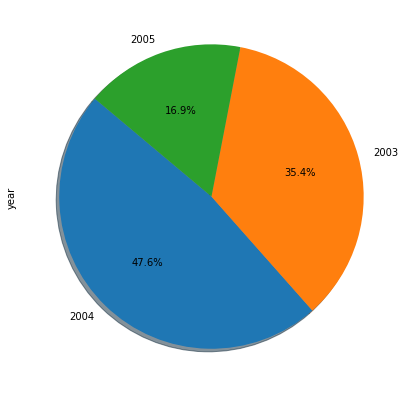

In [ ]:
# Pie chart for the years
data['year'].value_counts(sort=False).plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 140, figsize = (7,7))
plt.show()

### 6.1.2 Numerical Variables


> #### a) Measures of Central Tendency

In [ ]:
# Summary Statistics for the Numerical Variables
data.describe()

quantity_ordered        price  ...        year         msrp
count       2823.000000  2823.000000  ...  2823.00000  2823.000000
mean          35.092809    83.658544  ...  2003.81509   100.715551
std            9.741443    20.174277  ...     0.69967    40.187912
min            6.000000    26.880000  ...  2003.00000    33.000000
25%           27.000000    68.860000  ...  2003.00000    68.000000
50%           35.000000    95.700000  ...  2004.00000    99.000000
75%           43.000000   100.000000  ...  2004.00000   124.000000
max           97.000000   100.000000  ...  2005.00000   214.000000

[8 rows x 7 columns]

In [ ]:
# Mean
mean1 = data['sales'].mean()
print("The mean for the sales is: ", mean1)
mean2 = data['msrp'].mean()
print("The mean for the MSRP is: ", mean2)
mean3 = data['quantity_ordered'].mean()
print("The mean for the quantity ordered is: ", mean3)
mean4 = data['price'].mean()
print("The mean for the price is: ", mean4)

The mean for the sales is:  3553.88907190932
The mean for the MSRP is:  100.71555083244775
The mean for the quantity ordered is:  35.09280906836698
The mean for the price is:  83.65854410201929


In [ ]:
# Mode
mode1 = data['sales'].mode()
print("The mode for the sales is: ", mode1)
mode2 = data['msrp'].mode()
print("The mode for the MSRP is: ", mode2)
mode3 = data['quantity_ordered'].mode()
print("The mean for the quantity ordered is: ", mode3)
mode4 = data['price'].mode()
print("The mean for the price is: ", mode4)

The mode for the sales is:  0    3003.0
dtype: float64
The mode for the MSRP is:  0    118
dtype: int64
The mean for the quantity ordered is:  0    34
dtype: int64
The mean for the price is:  0    100.0
dtype: float64


In [ ]:
# Median 
median1 = data['sales'].median()
print("The mode for the sales is: ", median1)
median2 = data['msrp'].median()
print("The mode for the MSRP is: ", median2)
median3 = data['quantity_ordered'].median()
print("The mean for the quantity ordered is: ", median3)
median4 = data['price'].median()
print("The mean for the price is: ", median4)

The mode for the sales is:  3184.8
The mode for the MSRP is:  99.0
The mean for the quantity ordered is:  35.0
The mean for the price is:  95.7


> #### b) Measures of Dispersion

In [ ]:
# Standard deviation
std1 = data['sales'].std()
print("The standard deviation for the sales is: ", std1)
std2 = data['msrp'].std()
print("The standard deviation for the MSRP is: ", std2)
std3 = data['quantity_ordered'].std()
print("The standard deviation for the quantity ordered is: ", std3)
std4 = data['price'].std()
print("The standard deviation for the price is: ", std4)

The standard deviation for the sales is:  1841.8651057401805
The standard deviation for the MSRP is:  40.187911677203104
The standard deviation for the quantity ordered is:  9.74144273706961
The standard deviation for the price is:  20.174276527840703


In [ ]:
# Variance
var1 = data['sales'].var()
print("The variance for the sales is: ", var1)
var2 = data['msrp'].var()
print("The variance for the MSRP is: ", var2)
var3 = data['quantity_ordered'].var()
print("The variance for the quantity ordered is: ", var3)
var4 = data['price'].var()
print("The variance for the price is: ", var4)

The variance for the sales is:  3392467.0677432865
The variance for the MSRP is:  1615.0682449746778
The variance for the quantity ordered is:  94.89570659960627
The variance for the price is:  407.0014334217844


In [ ]:
# Range 
max1 = data['sales'].max()
min1 = data['sales'].min()
range1 = max1 - min1
print("The range for the sales is: ", range1)
max2 = data['msrp'].max()
min2 = data['msrp'].min()
range2 = max2 - min2
print("The range for the MSRP is: ", range2)
max3 = data['quantity_ordered'].max()
min3 = data['quantity_ordered'].min()
range3 = max3 - min3
print("The range for the quantity ordered is: ", range3)
max4 = data['price'].max()
min4 = data['price'].min()
range4 = max4 - min4
print("The range for the price is: ", range4)

The range for the sales is:  13600.67
The range for the MSRP is:  181
The range for the quantity ordered is:  91
The range for the price is:  73.12


In [ ]:
# Skewness
skew1 = data['sales'].skew()
print("The skewness for the sales is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = data['msrp'].skew()
print("The skewness for the MSRP is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = data['quantity_ordered'].skew()
print("The skewness for the quantity ordered is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew4 = data['price'].skew()
print("The skewness for the price is: ", skew4)
if skew4 == 0:
  print("The distribution is symmetrical")
elif skew4 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')


The skewness for the sales is:  1.161076000881289
The distribution is positively skewed


The skewness for the MSRP is:  0.5801750538648159
The distribution is positively skewed


The skewness for the quantity ordered is:  0.36258532878096345
The distribution is positively skewed


The skewness for the price is:  -0.9466488589840762
The distribution is negatively skewed




In [ ]:
# Kurtosis
kurt1 = data['sales'].kurt()
print("The kurtosis for the sales is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = data['msrp'].kurt()
print("The kurtosis for the MSRP is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = data['quantity_ordered'].kurt()
print("The kurtosis for the quantity ordered is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt4 = data['price'].kurt()
print("The kurtosis for the price is: ", kurt4)
if kurt4 > 0:
  print("Leptokurtic")
elif kurt4 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis for the sales is:  1.7926764690198267
Leptokurtic


The kurtosis for the MSRP is:  -0.1318145206625454
Platykurtic


The kurtosis for the quantity ordered is:  0.4157437897745657
Leptokurtic


The kurtosis for the price is:  -0.37481769302763945
Platykurtic




In [ ]:
# Quantiles
quantile1 = data['sales'].quantile([0.25,0.5,0.75])
print("The quantiles for the sales data are: ", quantile1)
quantile2 = data['msrp'].quantile([0.25,0.5,0.75])
print("The quantiles for MSRP are: ", quantile2)
quantile3 = data['quantity_ordered'].quantile([0.25,0.5,0.75])
print("The quantiles for quantity ordered are: ", quantile3)
quantile4 = data['price'].quantile([0.25,0.5,0.75])
print("The quantiles for price are: ", quantile4)

The quantiles for the sales data are:  0.25    2203.43
0.50    3184.80
0.75    4508.00
Name: sales, dtype: float64
The quantiles for MSRP are:  0.25     68.0
0.50     99.0
0.75    124.0
Name: msrp, dtype: float64
The quantiles for quantity ordered are:  0.25    27.0
0.50    35.0
0.75    43.0
Name: quantity_ordered, dtype: float64
The quantiles for price are:  0.25     68.86
0.50     95.70
0.75    100.00
Name: price, dtype: float64


In [ ]:
# We created a profiling report for our data
!pip install pandas-profiling==2.7.1
#!pip install pandas-profiling==1.4.3

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof


     |████████████████████████████████| 256kB 7.6MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 9.8MB/s 
     |████████████████████████████████| 1.1MB 40.3MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 296kB 47.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=2773af8ab827a0c37c2f2e4f47bc527079958c6ff628499b4b5fb6c5ae20ea15
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=d5c477ff6310c6b0a71a6b4c69f1574565f5e4aef6c38cce3db101480e4dbf23
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing ins

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Summary Statistics for the Numerical Variables
data.describe()

quantity_ordered        price  ...        year         msrp
count       2823.000000  2823.000000  ...  2823.00000  2823.000000
mean          35.092809    83.658544  ...  2003.81509   100.715551
std            9.741443    20.174277  ...     0.69967    40.187912
min            6.000000    26.880000  ...  2003.00000    33.000000
25%           27.000000    68.860000  ...  2003.00000    68.000000
50%           35.000000    95.700000  ...  2004.00000    99.000000
75%           43.000000   100.000000  ...  2004.00000   124.000000
max           97.000000   100.000000  ...  2005.00000   214.000000

[8 rows x 7 columns]

## 6.2 Bivariate Analysis


### 6.2.1 Numerical and Numerical Variables

> #### a) Scatter Plots

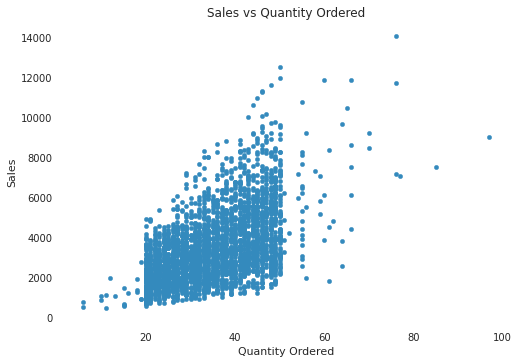

In [ ]:
# Scatter plot between quantity ordered and sales
data.plot(x = 'quantity_ordered', y = 'sales', kind='scatter')
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

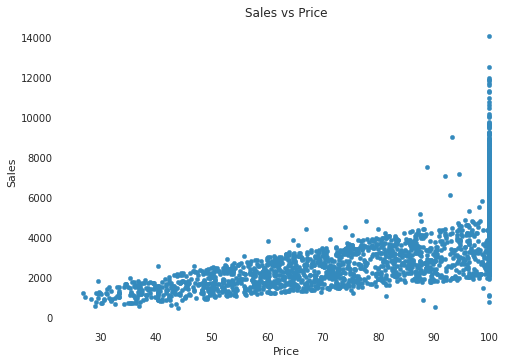

In [ ]:
# Scatter Plot between Price and Sales
data.plot(x = 'price', y = 'sales', kind='scatter')
plt.title('Sales vs Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

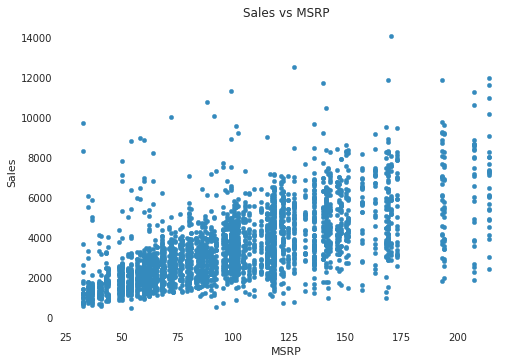

In [ ]:
# Scatter plot between msrp and sales
data.plot(x = 'msrp', y = 'sales', kind='scatter')
plt.title('Sales vs MSRP')
plt.xlabel('MSRP')
plt.ylabel('Sales')
plt.show()

> #### b) Correlation

In [ ]:
# We could use the correlation matrix to determine 
# the correlation between sales and other variables
corr_matrix1 = data['sales'].corr(data['msrp'])
print("The correlation matrix between msrp and sales is: ", corr_matrix1)
print("\n")
corr_matrix2 = data['sales'].corr(data['quantity_ordered'])
print("The correlation matrix between quantity ordered and the sales is: ", corr_matrix2)
print("\n")
corr_matrix3 = data['sales'].corr(data['price'])
print("The correlation matrix between price and the sales is: ", corr_matrix3)
print("\n")

The correlation matrix between msrp and sales is:  0.6352394340572508


The correlation matrix between quantity ordered and the sales is:  0.5514261919183568


The correlation matrix between price and the sales is:  0.6578409283176871




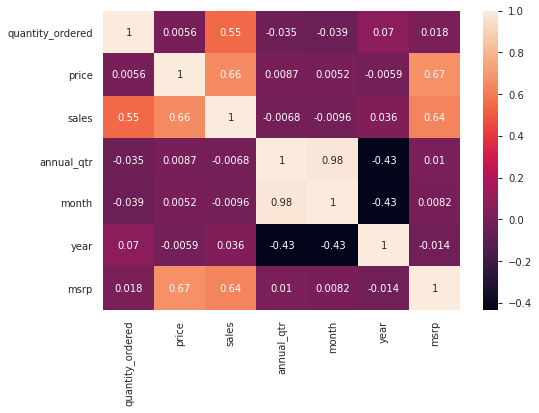

In [ ]:
# We could also use a heatmap to determine the correlation in our data
sns.heatmap(data.corr(),annot=True)
plt.show()

### 6.2.2 Categorical and Categorical Variables

> #### a) Stacked Column Charts

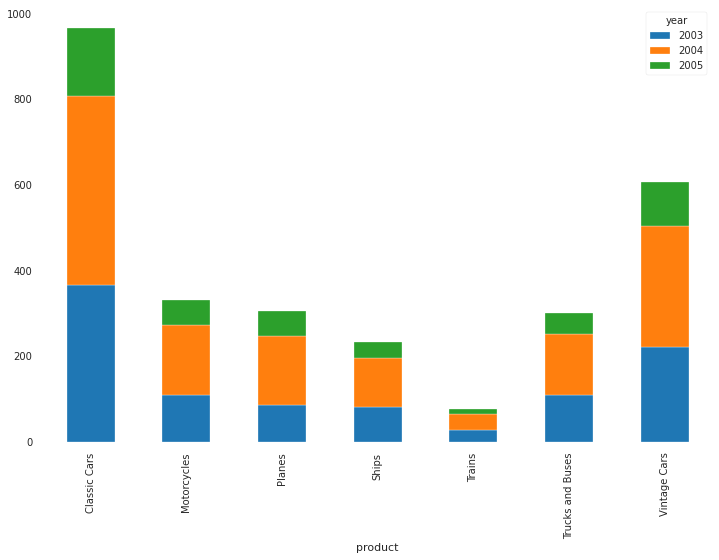

In [ ]:
# Stacked Column Chart for Products vs the Year they were sold
pd.crosstab(data['product'],data['year']).plot(kind="bar",stacked=True,figsize=(12,8))

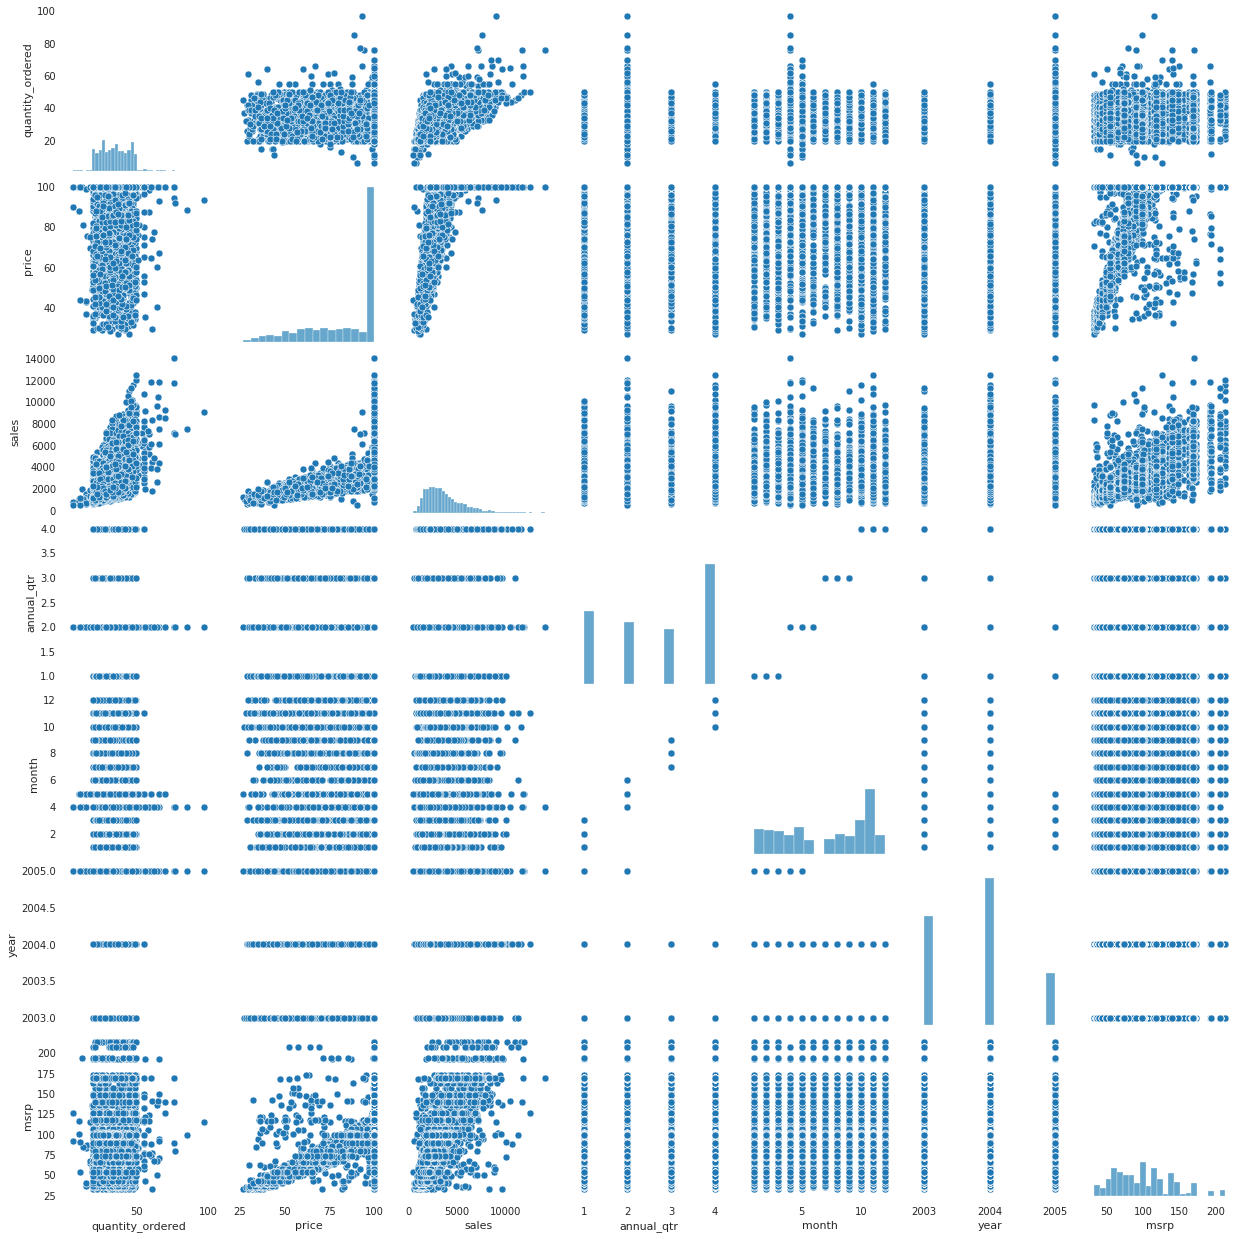

In [ ]:
sns.pairplot(data)
plt.show()

**Hypothesis Idea : Most cars are not sold during the last quarter of the year. 
Interesting because this is when most people get their annual bonuses and thus decide to either go for vacations or upgrade their living standards / cars. 
Alternative : Most cars are sold during the last quarter of the year**

### 6.2.3 Categorical and Numerical Variables

> #### a) Line Graph

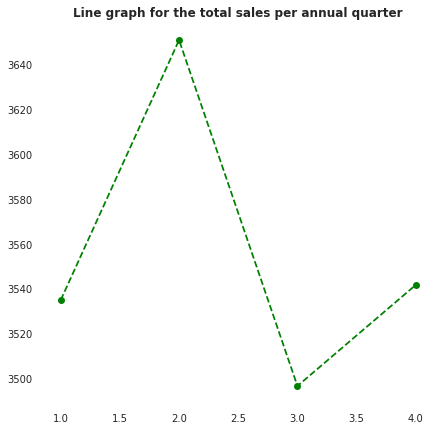

In [ ]:
# Line graph for the total number of sales per annual quarter

# First we group the annual quarters by the number of sales made
quarter = data.groupby('annual_qtr')['sales'].mean().reset_index(name= 'Total sales per annual quarter')

# Plot a line graph using the above grouped data 
x = quarter['annual_qtr']
y= quarter['Total sales per annual quarter']
plt.figure(figsize=(7,7))
plt.title("Line graph for the total sales per annual quarter", fontweight='bold')
plt.plot(x,y, color = 'green', marker = 'o', linestyle = '--')
plt.show()

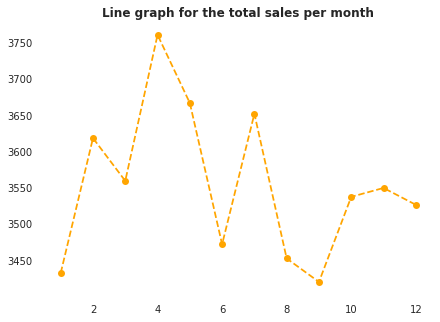

In [ ]:
# Line graph for the total sales per month

# First we group the month by the total sales made
month = data.groupby('month')['sales'].mean().reset_index(name= 'Total sales per month')

# Plot the line graph 
x = month['month']
y= month['Total sales per month']
plt.figure(figsize=(7,5))
plt.title("Line graph for the total sales per month", fontweight='bold')
plt.plot(x,y, color = 'orange', marker = 'o', linestyle = '--')
plt.show()

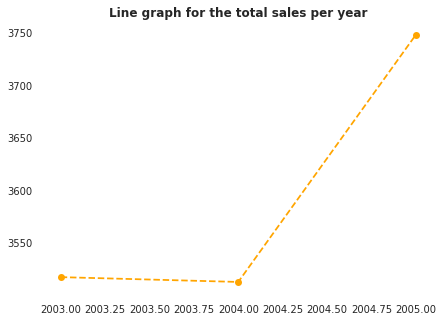

In [ ]:
# Line graph for the total sales per year

# First we group the month by the total sales made
month = data.groupby('year')['sales'].mean().reset_index(name= 'Total sales per year')

# Plot the line graph 
x = month['year']
y= month['Total sales per year']
plt.figure(figsize=(7,5))
plt.title("Line graph for the total sales per year", fontweight='bold')
plt.plot(x,y, color = 'orange', marker = 'o', linestyle = '--')
plt.show()

# Hypothesis Testing

In [ ]:
# Ho = mean sales of classical cars = vintage
#Ha = mean sales of Classical cars !=  vintage

In [ ]:
# Stratified sample
strat_output = data.groupby('product', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['product'].value_counts())

# Check the stratified output
print(strat_output)

Classic Cars        97
Vintage Cars        61
Motorcycles         33
Planes              31
Trucks and Buses    30
Ships               23
Trains               8
Name: product, dtype: int64
      quantity_ordered   price    sales  ...    country deal_size    contact_name
1865                44   79.06  3478.64  ...      Spain    Medium     DiegoFreyre
358                 22   76.61  1685.42  ...    Germany     Small    RolandKeitel
406                 41  100.00  4910.57  ...         UK    Medium  ElizabethDevon
878                 29  100.00  5127.20  ...      Spain    Medium     DiegoFreyre
1185                44   84.88  3734.72  ...     France    Medium     PaulHenriot
...                ...     ...      ...  ...        ...       ...             ...
501                 41   50.14  2055.74  ...        USA     Small    MichaelFrick
1835                46   84.97  3908.62  ...        USA    Medium     JuriYoshido
1842                43   97.87  4208.41  ...        USA    Medium      Ju

In [ ]:
#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.

In [ ]:
code1 = strat_output[strat_output['product']== 'Vintage Cars']
code2 = strat_output[strat_output['product']== 'Classic Cars']

In [ ]:
 #Testing the normality of the second samples
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Vintage Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
2.2010060887051927e-27


In [ ]:
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Classic Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
4.0188023313228354e-25


In [ ]:
code1

quantity_ordered   price    sales  ...    country deal_size      contact_name
1304                34  100.00  3580.88  ...     Canada    Medium  ElizabethLincoln
1005                20  100.00  2731.80  ...    Denmark     Small        PalleIbsen
1619                49   49.28  2414.72  ...        USA     Small         SueTaylor
1011                33  100.00  5273.73  ...        USA    Medium     ValarieNelson
971                 49  100.00  5285.14  ...        USA    Medium     SteveThompson
...                ...     ...      ...  ...        ...       ...               ...
501                 41   50.14  2055.74  ...        USA     Small      MichaelFrick
1835                46   84.97  3908.62  ...        USA    Medium       JuriYoshido
1842                43   97.87  4208.41  ...        USA    Medium        JulieBrown
1552                29   38.17  1106.93  ...  Singapore     Small    WendyVictorino
742                 24  100.00  2440.80  ...     France     Small      DanielTonini

[61 rows x 17 columns]

In [ ]:
code2

quantity_ordered   price    sales  ...  country deal_size      contact_name
1865                44   79.06  3478.64  ...    Spain    Medium       DiegoFreyre
358                 22   76.61  1685.42  ...  Germany     Small      RolandKeitel
406                 41  100.00  4910.57  ...       UK    Medium    ElizabethDevon
878                 29  100.00  5127.20  ...    Spain    Medium       DiegoFreyre
1185                44   84.88  3734.72  ...   France    Medium       PaulHenriot
...                ...     ...      ...  ...      ...       ...               ...
415                 46   88.45  4068.70  ...  Finland    Medium     KalleSuominen
401                 27  100.00  3544.56  ...      USA    Medium      ValarieYoung
1798                37   42.67  1578.79  ...   Norway     Small      VeyselOeztan
202                 31  100.00  6570.76  ...       UK    Medium  VictoriaAshworth
165                 41  100.00  8296.35  ...      USA     Large        JulieBrown

[97 rows x 17 columns]

In [ ]:
#finding the standard error
std_vint = code1.sales.std()
std_class = code2.sales.std()
se = np.sqrt(std_vint**2/len(code1) + std_class**2/len(code2))
se

301.44896141328167

In [ ]:
#Use the standard error to get the test statistic.
#calculate the best estimate
mu_vint = code1.sales.mean()     #Mean sales for vintage cars
mu_class = code2.sales.mean() 
 #Mean sales for classics cars = mu_fe - mu_male    #hypothesized estimate 
mu_diff = mu_class - mu_vint
mu_diff   #null hypothesis: difference of two mean = zerotest_statistic = (be-he)/se

849.9663545715725

In [ ]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return z,pval


In [ ]:
twoSampZ(mu_vint, mu_class, mu_diff, std_vint, std_class, len(code1), len(code2))


(-5.639205725484537, 1.7083633396808295e-08)

In [ ]:
alpha = 0.05
if 1.7083633396808295e-08 < alpha:
  print("Reject the null hypothesis ")
else:
  print("Fail to reject the null hypothesis")


Reject the null hypothesis 


In [ ]:
The P-Value result is significant at p < .05.


#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.


Conclusion


*   There is enough evidence to suggest that the mean sales of the vintage cars and classic cars is significantly different from each other
*  The result is significant at p < .05.




# Hypothesis Testing

In [ ]:
# Ho = mean sales of classical cars = vintage
#Ha = mean sales of Classical cars !=  vintage

In [ ]:
# Stratified sample
strat_output = data.groupby('product', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['product'].value_counts())

# Check the stratified output
print(strat_output)

Classic Cars        97
Vintage Cars        61
Motorcycles         33
Planes              31
Trucks and Buses    30
Ships               23
Trains               8
Name: product, dtype: int64
      quantity_ordered   price    sales  ...    country deal_size    contact_name
1865                44   79.06  3478.64  ...      Spain    Medium     DiegoFreyre
358                 22   76.61  1685.42  ...    Germany     Small    RolandKeitel
406                 41  100.00  4910.57  ...         UK    Medium  ElizabethDevon
878                 29  100.00  5127.20  ...      Spain    Medium     DiegoFreyre
1185                44   84.88  3734.72  ...     France    Medium     PaulHenriot
...                ...     ...      ...  ...        ...       ...             ...
501                 41   50.14  2055.74  ...        USA     Small    MichaelFrick
1835                46   84.97  3908.62  ...        USA    Medium     JuriYoshido
1842                43   97.87  4208.41  ...        USA    Medium      Ju

In [ ]:
#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.

In [ ]:
code1 = strat_output[strat_output['product']== 'Vintage Cars']
code2 = strat_output[strat_output['product']== 'Classic Cars']

In [ ]:
 #Testing the normality of the second samples
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Vintage Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
2.2010060887051927e-27


In [ ]:
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Classic Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
4.0188023313228354e-25


In [ ]:
code1

quantity_ordered   price    sales  ...    country deal_size      contact_name
1304                34  100.00  3580.88  ...     Canada    Medium  ElizabethLincoln
1005                20  100.00  2731.80  ...    Denmark     Small        PalleIbsen
1619                49   49.28  2414.72  ...        USA     Small         SueTaylor
1011                33  100.00  5273.73  ...        USA    Medium     ValarieNelson
971                 49  100.00  5285.14  ...        USA    Medium     SteveThompson
...                ...     ...      ...  ...        ...       ...               ...
501                 41   50.14  2055.74  ...        USA     Small      MichaelFrick
1835                46   84.97  3908.62  ...        USA    Medium       JuriYoshido
1842                43   97.87  4208.41  ...        USA    Medium        JulieBrown
1552                29   38.17  1106.93  ...  Singapore     Small    WendyVictorino
742                 24  100.00  2440.80  ...     France     Small      DanielTonini

[61 rows x 17 columns]

In [ ]:
code2

quantity_ordered   price    sales  ...  country deal_size      contact_name
1865                44   79.06  3478.64  ...    Spain    Medium       DiegoFreyre
358                 22   76.61  1685.42  ...  Germany     Small      RolandKeitel
406                 41  100.00  4910.57  ...       UK    Medium    ElizabethDevon
878                 29  100.00  5127.20  ...    Spain    Medium       DiegoFreyre
1185                44   84.88  3734.72  ...   France    Medium       PaulHenriot
...                ...     ...      ...  ...      ...       ...               ...
415                 46   88.45  4068.70  ...  Finland    Medium     KalleSuominen
401                 27  100.00  3544.56  ...      USA    Medium      ValarieYoung
1798                37   42.67  1578.79  ...   Norway     Small      VeyselOeztan
202                 31  100.00  6570.76  ...       UK    Medium  VictoriaAshworth
165                 41  100.00  8296.35  ...      USA     Large        JulieBrown

[97 rows x 17 columns]

In [ ]:
#finding the standard error
std_vint = code1.sales.std()
std_class = code2.sales.std()
se = np.sqrt(std_vint**2/len(code1) + std_class**2/len(code2))
se

301.44896141328167

In [ ]:
#Use the standard error to get the test statistic.
#calculate the best estimate
mu_vint = code1.sales.mean()     #Mean sales for vintage cars
mu_class = code2.sales.mean() 
 #Mean sales for classics cars = mu_fe - mu_male    #hypothesized estimate 
mu_diff = mu_class - mu_vint
mu_diff   #null hypothesis: difference of two mean = zerotest_statistic = (be-he)/se

849.9663545715725

In [ ]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return z,pval


In [ ]:
twoSampZ(mu_vint, mu_class, mu_diff, std_vint, std_class, len(code1), len(code2))


(-5.639205725484537, 1.7083633396808295e-08)

In [ ]:
alpha = 0.05
if 1.7083633396808295e-08 < alpha:
  print("Reject the null hypothesis ")
else:
  print("Fail to reject the null hypothesis")


Reject the null hypothesis 


In [ ]:
The P-Value result is significant at p < .05.


#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.


Conclusion


*   There is enough evidence to suggest that the mean sales of the vintage cars and classic cars is significantly different from each other
*  The result is significant at p < .05.




# Hypothesis Testing

In [ ]:
# Ho = mean sales of classical cars = vintage
#Ha = mean sales of Classical cars !=  vintage

In [ ]:
# Stratified sample
strat_output = data.groupby('product', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['product'].value_counts())

# Check the stratified output
print(strat_output)

Classic Cars        97
Vintage Cars        61
Motorcycles         33
Planes              31
Trucks and Buses    30
Ships               23
Trains               8
Name: product, dtype: int64
      quantity_ordered   price     sales  ...    country deal_size      contact_name
302                 29  100.00   3167.38  ...    Denmark    Medium     JyttePetersen
2050                23  100.00   2802.09  ...  Australia     Small      TonyCalaghan
1849                24   81.33   1951.92  ...        USA     Small         JulieKing
632                 21  100.00   3286.08  ...     Norway    Medium      VeyselOeztan
198                 44  100.00  10606.20  ...    Finland     Large     KalleSuominen
...                ...     ...       ...  ...        ...       ...               ...
978                 26   85.87   2232.62  ...     France     Small      DanielTonini
1560                32   70.56   2257.92  ...      Spain     Small       DiegoFreyre
908                 35   57.46   2011.10  ... 

In [ ]:
#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.

In [ ]:
code1 = strat_output[strat_output['product']== 'Vintage Cars']
code2 = strat_output[strat_output['product']== 'Classic Cars']

In [ ]:
 #Testing the normality of the second samples
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Vintage Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
2.2010060887051927e-27


In [ ]:
from scipy.stats import shapiro
statistc,p_value=shapiro(strat_output['product']== 'Classic Cars')
if p_value>0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is not normally distributed
4.0188023313228354e-25


In [ ]:
code1

quantity_ordered   price    sales  ...    country deal_size      contact_name
1347                25   53.83  1345.75  ...    Austria     Small      RolandMendel
2305                49   57.10  2797.90  ...      Spain     Small       DiegoFreyre
2025                48   34.47  1654.56  ...         UK     Small  VictoriaAshworth
1543                37   27.22  1007.14  ...        USA     Small        JulieBrown
2309                20   66.04  1320.80  ...  Australia     Small     PeterFerguson
...                ...     ...      ...  ...        ...       ...               ...
978                 26   85.87  2232.62  ...     France     Small      DanielTonini
1560                32   70.56  2257.92  ...      Spain     Small       DiegoFreyre
908                 35   57.46  2011.10  ...     Norway     Small   JonasBergulfsen
928                 26  100.00  2979.08  ...         UK     Small  VictoriaAshworth
1236                50   60.49  3024.50  ...    Finland    Medium   PirkkoKoskitalo

[61 rows x 17 columns]

In [ ]:
code2

quantity_ordered   price  ...  deal_size       contact_name
302                 29  100.00  ...     Medium      JyttePetersen
2050                23  100.00  ...      Small       TonyCalaghan
1849                24   81.33  ...      Small          JulieKing
632                 21  100.00  ...     Medium       VeyselOeztan
198                 44  100.00  ...      Large      KalleSuominen
...                ...     ...  ...        ...                ...
1049                33  100.00  ...     Medium     VioletaBenitez
295                 46  100.00  ...     Medium    MichaelChandler
304                 22  100.00  ...      Small     MaurizioMoroni
600                 38   82.39  ...     Medium         ArnoldCruz
418                 97   93.28  ...      Large  FrederiqueCiteaux

[97 rows x 17 columns]

In [ ]:
#finding the standard error
std_vint = code1.sales.std()
std_class = code2.sales.std()
se = np.sqrt(std_vint**2/len(code1) + std_class**2/len(code2))
se

306.30065969033853

In [ ]:
#Use the standard error to get the test statistic.
#calculate the best estimate
mu_vint = code1.sales.mean()     #Mean sales for vintage cars
mu_class = code2.sales.mean() 
 #Mean sales for classics cars = mu_fe - mu_male    #hypothesized estimate 
mu_diff = mu_class - mu_vint
mu_diff   #null hypothesis: difference of two mean = zerotest_statistic = (be-he)/se

1195.0463461213458

In [ ]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return z,pval


In [ ]:
twoSampZ(mu_vint, mu_class, mu_diff, std_vint, std_class, len(code1), len(code2))


(-7.8030935181759284, 5.995204332975845e-15)

In [ ]:
alpha = 0.05
if 1.7083633396808295e-08 < alpha:
  print("Reject the null hypothesis ")
else:
  print("Fail to reject the null hypothesis")


Reject the null hypothesis 


In [ ]:
The P-Value result is significant at p < .05.


#Both the classic cars  and vintage cars populations have large enough data in this data. 
#So, checking for the normality of the data is not required.


Conclusion


*   There is enough evidence to suggest that the mean sales of the vintage cars and classic cars is significantly different from each other
*  The result is significant at p < .05.


